In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


In [3]:
# help(SeqChrom)

Added in option to load multipe mzml files into engine before metaunidec processing.

In [4]:
folder = "C:\\Users\\cm19ljc\\OneDrive - University of Leeds\\Lawrence\\"

spectra = folder +"mzML format.mzML"

plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/3x injection.xlsx"

In [5]:
eng.load_mzml(spectra, clear_hdf5=True)

Reading mzML: C:\Users\cm19ljc\OneDrive - University of Leeds\Lawrence\mzML format.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\OneDrive - University of Leeds\Lawrence\mzML format.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


False

1070 2
Noise Level: 0.03357343719702872 Window: 0.6
1.0312 0.13711000000000007
1.95747 0.1411800000000003
2.88835 0.13712999999999997
4.23498 0.6733000000000002
Bad Peak [5.02062    0.03889817] 0.26602000000000015 [4.77123, 5.03725]
Getting scans: [98, 131]
Length merge axis: 28915
Getting scans: [321, 355]
Length merge axis: 30293
Getting scans: [545, 578]
Length merge axis: 31336


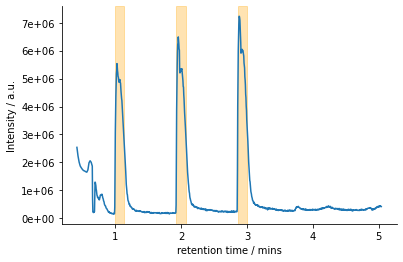

In [6]:
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = 1, ub = 3.6) 
eng.add_chrom_peaks2() 
eng.plot_tic(peak_windows = True)

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [7]:
help(eng.update_config)

Help on method update_config in module unidec_modules.v3_SeqChrom:

update_config(minmz='', maxmz='', massub=10000, masslb=100000, peakthresh=0.01, subtype=2, subbuff=100, datanorm=0, numit=100, massbins=1, mzsig=0, startz=10, endz=100, zzsig=1, psig=1, beta=0, psfun=0, peaknorm=0, peakwindow=10, exnorm=0, numz=50, mtabsig=0.0, molig=0.0, mzbins=0.0, msig=0.0, smooth=0, reductionpercent=0.0, aggressive=0, rawflag=0, nativezub=1000.0, nativezlb=-1000.0, poolflag=2, noiseflag=0, linflag=2, isotopemode=0, baselineflag=1, orbimode=0, peakplotthresh=0.1, adductmass=1.007276467, intthresh=0) method of unidec_modules.v3_SeqChrom.SeqChrom instance
    [summary]
    
    Args:
        minmz (str, optional): [description]. Defaults to "".
        maxmz (str, optional): [description]. Defaults to "".
        massub (int, optional): [description]. Defaults to 10000.
        masslb (int, optional): [description]. Defaults to 100000.
        peakthresh (float, optional): [description]. Defaults to 0

In [8]:
eng.update_config(masslb = 10000, massub = 20000, peakthresh = 0.05, minmz="")
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.18804510000000008
Execution Time: 15.300811999999997
Execution Time: 0.31021820000000133
Peak info saved to: C:\Users\cm19ljc\OneDrive - University of Leeds\Lawrence\UniDec_Figures_and_Files\mzML format_extracts.txt


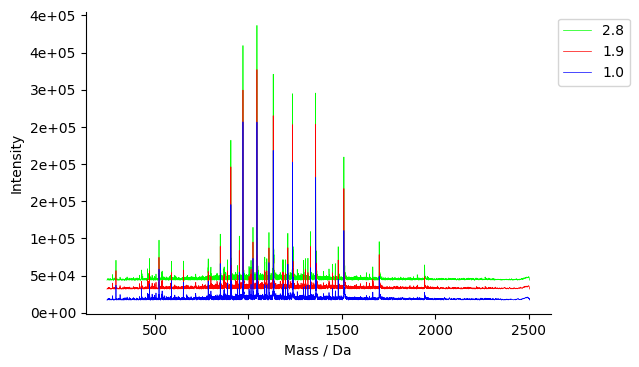

In [9]:
eng.plot_all(dtype = 'data2', combine = True, cmap = 'brg')

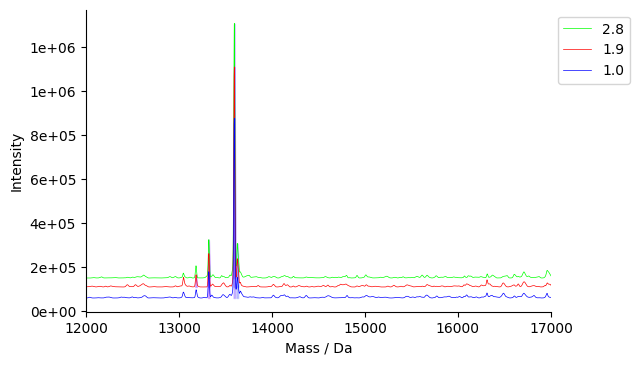

In [10]:
eng.plot_all(dtype = 'massdat', combine = True, cmap = 'brg', xlim = [12000, 17000])

In [11]:
eng.upload_map(plate_map)

(  Reaction    Species  Concentration Units     Mass Reagent_Type Sequence
 0       3x  Species 1          100.0    uM  13322.0      Protein      NaN
 1       3x  Species 2            NaN    uM  13595.0      Protein      NaN,
             Type Reaction Time  Species  Valid
 Well ID                                       
 1        Protein       3x    1      NaN   True
 2        Protein       3x    2      NaN   True
 3        Protein       3x    3      NaN   True)

In [12]:
eng.pmap

,Type,Reaction,Time,Species,Valid
Well ID,,,,,
1,Protein,3x,1,NaN,True
2,Protein,3x,2,NaN,True
3,Protein,3x,3,NaN,True


In [13]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,3x,Species 1,100.0,uM,13322.0,Protein,NaN
1,3x,Species 2,NaN,uM,13595.0,Protein,NaN


In [14]:
eng.process_maps(groupby = 'Reaction', variable = 'Species')

In [15]:
eng.pmap2

,Type,Reaction,Time,Species,Valid,Species 1,Species 2,Spectra
Well ID,,,,,,,,
1,Protein,3x,1,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,3x,2,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,3x,3,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

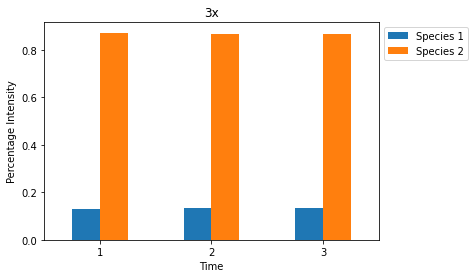

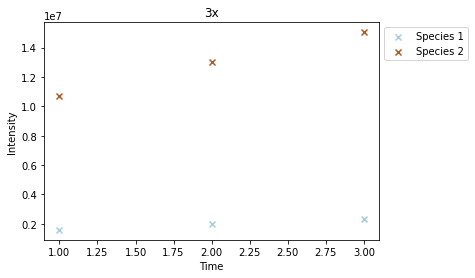

In [16]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Time')
# eng.invalidate("30")

eng.plot_data(cmap = 'Paired', datatype = 'integral')

In [17]:
dir(eng)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_export_proc',
 '_get_valid',
 '_read_long',
 '_read_short',
 '_set_spectra_colors',
 '_update_spectra',
 'add_chrom_peaks',
 'add_chrom_peaks2',
 'add_list_times',
 'add_manual_selection',
 'add_regular_times',
 'add_sliding_window',
 'attrs',
 'batch_extract',
 'batch_run_unidec',
 'batch_set_config',
 'check_badness',
 'chromdat',
 'chrompeaks',
 'chrompeaks_tranges',
 'clear',
 'clear_history',
 'combine_scanpeaks',
 'config',
 'config_count',
 'config_history',
 'copy_config',
 'data',
 'data_df',
 'dirname',
 'export_config',
 'export_params',
 'export_spectra',
 'extract_data',
 'filename',
 'filter_peaks',
 'fit_

In [18]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,3x,Species 1,100.0,uM,13322.0,Protein,NaN
1,3x,Species 2,NaN,uM,13595.0,Protein,NaN


In [19]:
eng.pmap3

,Type,Reaction,Time,Species,Valid,Species 1,Species 2,Spectra
Well ID,,,,,,,,
1,Protein,3x,1,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,3x,2,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,3x,3,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...


In [20]:
eng.pmap3["Species 1"].iloc[2]

<Species 1(Reaction = 3x, Species = Species 1, Concentration = 100.0, Units = uM, Mass = 13322.0, Reagent_Type = Protein, Sequence = nan, __name__ = Species 1, peak = <unidec_modules.peakstructure.Peak object at 0x0000011B090C0940>, speciesmap = None, pmap = None, integral = 2305865.25, color = [0.5 0.  1.  1. ], cmap = viridis, percentage = 0.13285139203071594)>